# Week #12 Object Recognition

In [17]:
%pip install -r ../requirements.txt

  Using cached torchsummary-1.5.1-py3-none-any.whl (2.8 kB)
You should consider upgrading via the '/Users/jirayuwat/Desktop/2110431-Intro-Digital-Imaging/env/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import cv2
import numpy as np

## HOG

* simple image

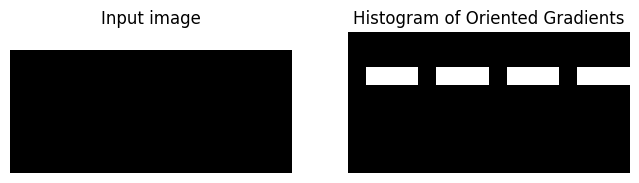

In [2]:
image = np.array([[1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
                  ,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
                  ,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
                  ,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
                  ,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

fd, hog_image = hog(image, orientations=5, pixels_per_cell=(4, 4), cells_per_block=(2, 2), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

* Astronaut image

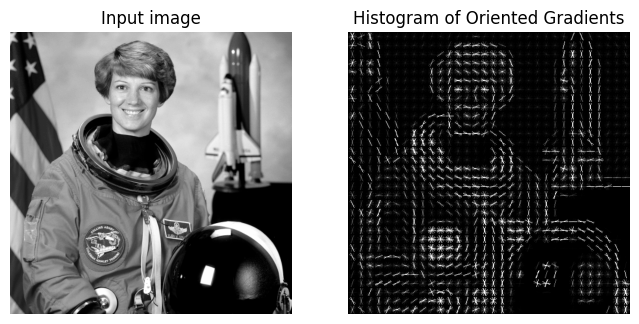

In [3]:
image = data.astronaut()
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

fd, hog_image = hog(image, orientations=9, pixels_per_cell=(16, 16), cells_per_block=(2, 2), visualize=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

## HOG + Neural Networks

* MNIST dataset

In [6]:
import numpy as np
from skimage.feature import hog
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.datasets import mnist


np.random.seed(0) # for reproducibility

# 1) Load Dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 2) (Optional) Data Normalization to [0,1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # 0 - 1
X_test /= 255


# 3) Feature Extraction
list_hog = []
for feature in X_train:
  fd = hog(feature, orientations=15, pixels_per_cell=(14,14),cells_per_block=(1,1))
  list_hog.append(fd)

hog_features_train = np.array(list_hog, 'float64')


# Feature Normalization
preProcess = preprocessing.MaxAbsScaler().fit(hog_features_train)
hog_features_transformed_train = preProcess.transform(hog_features_train)

# 4) Training classification model
model_hog_mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(100, 100), verbose=1,max_iter=20)
model_hog_mlp.fit(hog_features_transformed_train, y_train)
print("Training accuracy :: {}\n".format(model_hog_mlp.score(hog_features_transformed_train, y_train)))


# 5) Use the model for prediction (Evaluation on testing data)
list_hog_test = []
for feature in X_test:
  fd = hog(feature, orientations=9, pixels_per_cell=(14,14),cells_per_block=(1,1) )
  list_hog_test.append(fd)
hog_features_test = np.array(list_hog_test, 'float64')

hog_features_transformed_test = preProcess.transform(hog_features_test)

print("Testing Score :: {}\n".format(model_hog_mlp.score(hog_features_transformed_test, y_test)))



Iteration 1, loss = 0.78628122
Iteration 2, loss = 0.39915410
Iteration 3, loss = 0.34837939
Iteration 4, loss = 0.31781480
Iteration 5, loss = 0.29736463
Iteration 6, loss = 0.28401877
Iteration 7, loss = 0.27171790
Iteration 8, loss = 0.26447962
Iteration 9, loss = 0.25681239
Iteration 10, loss = 0.24910607
Iteration 11, loss = 0.24479783
Iteration 12, loss = 0.24029391
Iteration 13, loss = 0.23433062
Iteration 14, loss = 0.22951743
Iteration 15, loss = 0.22314154
Iteration 16, loss = 0.22113812
Iteration 17, loss = 0.21686723
Iteration 18, loss = 0.21239963
Iteration 19, loss = 0.20918651
Iteration 20, loss = 0.20611599
Training accuracy :: 0.9344833333333333



/Users/jirayuwat/Desktop/2110431-Intro-Digital-Imaging/env/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


ValueError: X has 36 features, but MaxAbsScaler is expecting 60 features as input.

* Inferencing

[9]


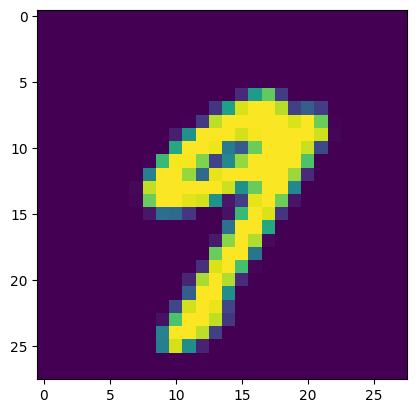

In [11]:
fd_test = hog(X_test[20].reshape((28,28)), orientations=9, pixels_per_cell=(14,14),cells_per_block=(1,1))
hog_features_transformed_test = preProcess.transform(fd_test.reshape((1,hog_features_test.shape[1])))
print(model_hog_mlp.predict(hog_features_transformed_test))

plt.imshow(X_test[20])
plt.show()

## CNN

In [18]:
import torch
from torch import nn
from torch.utils.data import DataLoader, random_split
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchsummary import summary

### Prep data

In [19]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = ToTensor(),
    download = True,
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    transform = ToTensor()
)

train_data, val_data = random_split(train_data,[50000,10000])


batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(train_data, batch_size=batch_size)
val_dataloader = DataLoader(val_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in train_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

for X, y in val_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break



100%|██████████| 9912422/9912422 [00:01<00:00, 9602725.64it/s] 


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 50578577.80it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 9699680.22it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 7372495.65it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64
Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


### Prep model

In [20]:
# Creating Models
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

import torch.nn.functional as F
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Sequential(
            nn.Conv2d(
                in_channels=1,
                out_channels=16,
                kernel_size=5,
                stride=1,
                padding=2,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(16, 32, 5, 1, 2),
            nn.ReLU(),
            nn.MaxPool2d(2),
        )
        # fully connected layer, output 10 classes
        self.out = nn.Linear(32 * 7 * 7, 10)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)

        # flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        x = x.view(x.size(0), -1)
        output = F.log_softmax(self.out(x), dim=1)
        return output




model = Net().to(device)
print(model)

summary(model, input_size=(1, 28, 28))

# Optimizing the Model Parameters
loss_fn = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)




Using cpu device
Net(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             416
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]          12,832
              ReLU-5           [-1, 32, 14, 14]               0
         MaxPool2d-6             [-1, 32, 7, 7]               

### Training

In [21]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)

        # print(type(pred),type(y))
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")



def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Accuracy: {(100*correct):>0.1f}%,  Avg loss: {test_loss:>8f} \n")

def val(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Val Accuracy: {(100*correct):>0.1f}%,  Avg loss: {test_loss:>8f} \n")

epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    val(val_dataloader, model, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 2.318877  [    0/50000]
loss: 0.071937  [ 6400/50000]
loss: 0.136264  [12800/50000]
loss: 0.297708  [19200/50000]
loss: 0.145122  [25600/50000]
loss: 0.128775  [32000/50000]
loss: 0.033282  [38400/50000]
loss: 0.005550  [44800/50000]
Val Accuracy: 98.0%,  Avg loss: 0.064353 

Epoch 2
-------------------------------
loss: 0.012101  [    0/50000]
loss: 0.017854  [ 6400/50000]
loss: 0.167151  [12800/50000]
loss: 0.314111  [19200/50000]
loss: 0.029480  [25600/50000]
loss: 0.211008  [32000/50000]
loss: 0.011516  [38400/50000]
loss: 0.008612  [44800/50000]
Val Accuracy: 98.0%,  Avg loss: 0.065854 

Epoch 3
-------------------------------
loss: 0.015484  [    0/50000]
loss: 0.008531  [ 6400/50000]
loss: 0.123063  [12800/50000]
loss: 0.199774  [19200/50000]
loss: 0.153556  [25600/50000]
loss: 0.273839  [32000/50000]
loss: 0.007671  [38400/50000]
loss: 0.004525  [44800/50000]
Val Accuracy: 98.4%,  Avg loss: 0.054777 

Epoch 4
-----------------------

### Inferencing

In [22]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

_model = Net().to(device)
weights=torch.load("model.pth")
_model.load_state_dict(weights)

print("Test accuracy")
test(test_dataloader, _model, loss_fn)



Saved PyTorch Model State to model.pth
Test accuracy
Test Accuracy: 98.4%,  Avg loss: 0.058122 

